In [1]:
#插入第三方库
import numpy as np
import pandas as pd
from pandas import DataFrame
from pandas import datetime
#数据可视化库
from matplotlib import pylab as plt
import seaborn as sns
import datetime
import time
from sklearn.cross_validation import train_test_split
from sklearn import cross_validation
import xgboost as xgb

from xgboost.sklearn import XGBClassifier
import operator

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#加载数据集
store=pd.read_csv("store.csv", low_memory=False)
#read_csv参数：parse_dates解析索引,index_col用作行索引的列编号，low_memory分块加载到内存，再低内存消耗中解析
train=pd.read_csv("train.csv", parse_dates=[2], low_memory=False)     #,index_col='Date')
test=pd.read_csv('test.csv', parse_dates=[3],low_memory=False)

In [3]:
#探索性数据分析：主要对train和store数据进行缺失值处理和数据基本特征展示

In [4]:
store.shape

(1115, 10)

In [5]:
store.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [6]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [7]:
store.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [8]:
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [9]:
store['CompetitionDistance'].fillna(store['CompetitionDistance'].median(), inplace=True)
#store['CompetitionDistance'].describe()

In [10]:
store.fillna(0,inplace=True)

In [11]:
#store数据集简要描述
#Store：Rossmann店铺的编码，没有空值
#StoreType：有四种不同的店铺类型：a,b,c,d，没有空值
#Assortment：描述分类级别：a,b,c，没有空值
#CompetitionDistance：离最近竞争对手店铺距离，有空值
#CompetitionOpenSinceMonth：最近竞争对手店铺开业时间：月份，有空值
#CompetitionOpenSinceYear：最近竞争对手店铺开业时间：年份，有空值
#Promo2：店铺的Promo2促销活动，0表示店铺没有参加促销，1表示店铺参加促销，没有空值
#Promo2SinceWeek：表示店铺开始参加Promo2促销活动的当年第几周，不参加促销店铺为空
#Promo2SinceYear：表示店铺开始参加Promo2促销活动的年份，不参加促销店铺为空
#PromoInterval：表示Promo2促销活动每年的启动月份间隔，例如Jan,Apr,Jul,Oct表示当年1,4,7,10月份开始有Promo2促销活动，不参加为空

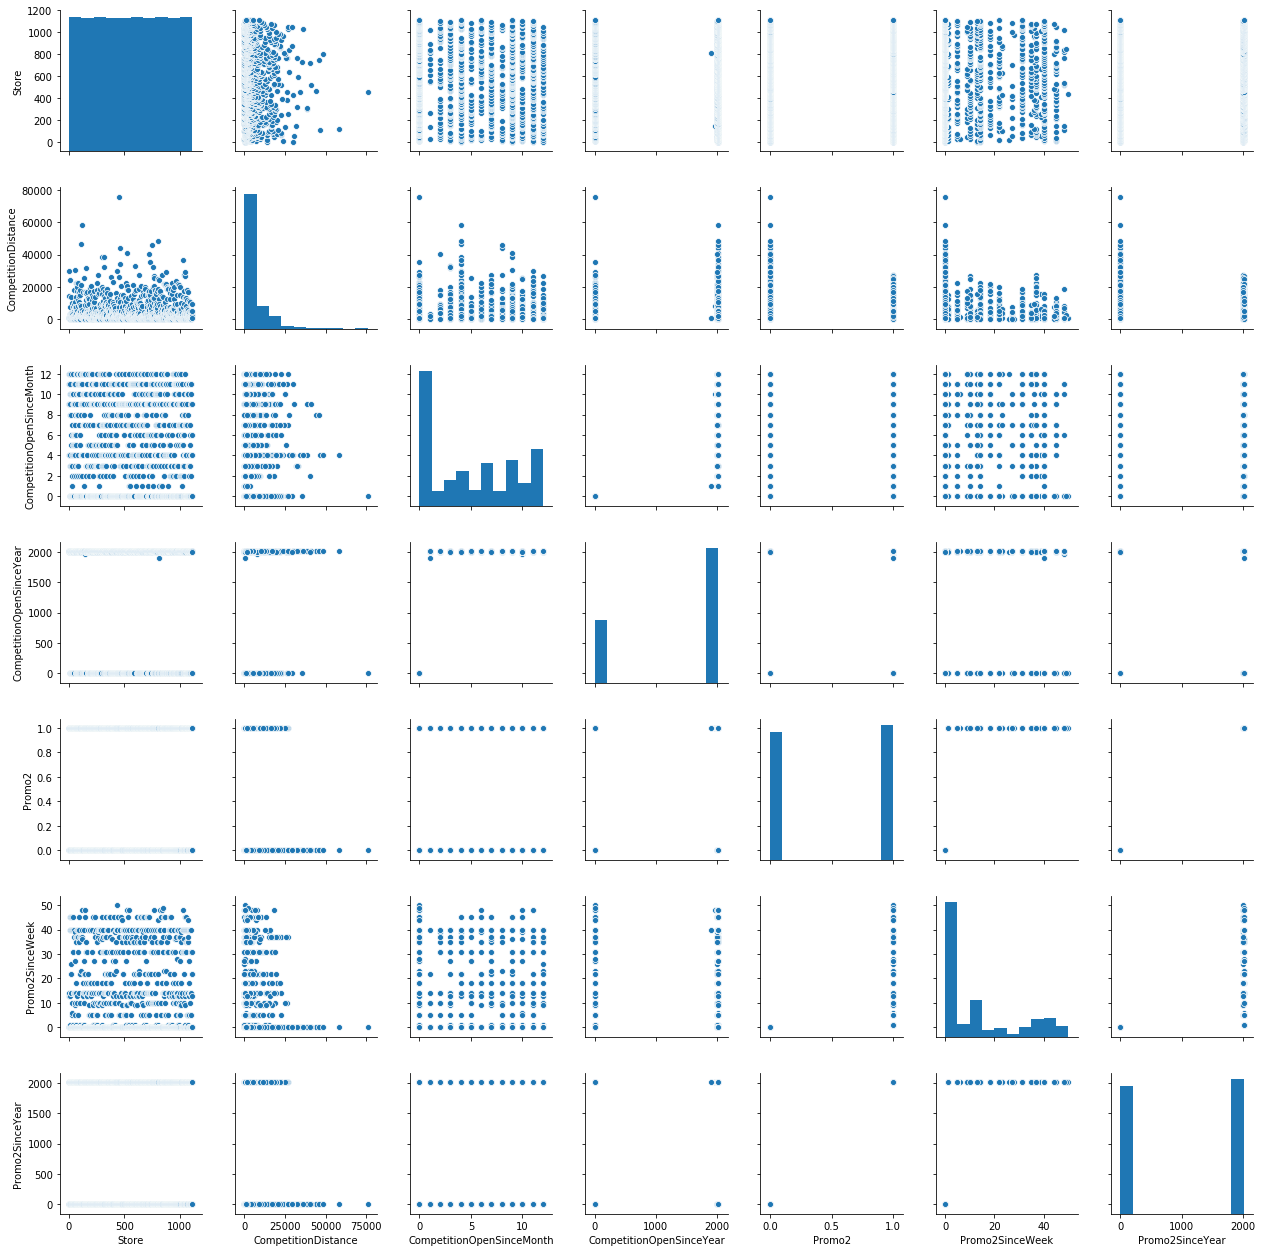

In [12]:
sns.pairplot(store)

In [13]:
train.shape

(1017209, 9)

In [14]:
train.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [15]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [16]:
train['Sales'].describe() 

count    1.017209e+06
mean     5.773819e+03
std      3.849926e+03
min      0.000000e+00
25%      3.727000e+03
50%      5.744000e+03
75%      7.856000e+03
max      4.155100e+04
Name: Sales, dtype: float64

In [17]:
train.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


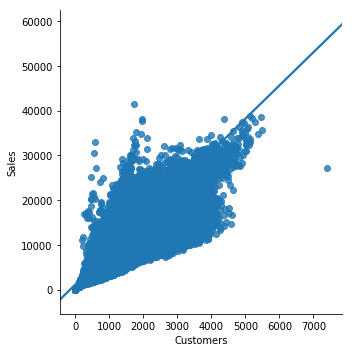

In [18]:
sns.lmplot(x='Customers',y='Sales',data=train)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


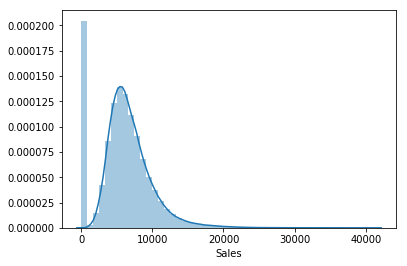

In [19]:
sns.distplot(train['Sales'])

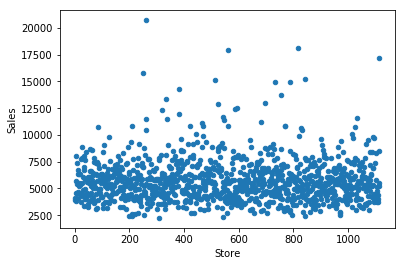

In [20]:
avg_per_store = train[['Sales', 'Store']].groupby('Store').mean()
avg_per_store.reset_index().plot(kind='scatter', x='Store', y='Sales')

In [ ]:
#train数据集简要描述
#Store：店铺编号，范围【1-1115】，与store数据集store对应，没有空值
#DayOfWeek：一周的第几天，范围【1-7】，没有空值
#Date：销售日期，格式 xxxx-xx-xx，没有空值
#Sales：营业额，目标变量，范围【0-41551】，没有空值
#Customers：对应客户数量，范围【0-7388】，没有空值
#Open：表示是否正在营业中，0表示关门，1表示营业，没有空值
#Promo：表示营业当天是否有促销活动，0表示没有促销，1表示有促销，没有空值
#StateHoliday：表示州假期，一般情况州假期商店关门，少数店铺开门
#SchoolHoliday：表示学校假期，0表示学校假期关门，1表示学校假期照常营业

In [21]:
test.shape

(41088, 8)

In [22]:
test.columns

Index(['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday'],
      dtype='object')

In [23]:
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [24]:
test.describe()

,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday
count,41088.000000,41088.000000,41088.000000,41077.000000,41088.000000,41088.000000
mean,20544.500000,555.899533,3.979167,0.854322,0.395833,0.443487
std,11861.228267,320.274496,2.015481,0.352787,0.489035,0.496802
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,10272.750000,279.750000,2.000000,1.000000,0.000000,0.000000
50%,20544.500000,553.500000,4.000000,1.000000,0.000000,0.000000
75%,30816.250000,832.250000,6.000000,1.000000,1.000000,1.000000
max,41088.000000,1115.000000,7.000000,1.000000,1.000000,1.000000


In [25]:
test.isnull().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

In [26]:
test.fillna(1,inplace=True)

In [27]:
#display(train.isnull().sum(),test.isnull().sum(),store.isnull().sum())

In [28]:
#合并数据集store&train为新的数据训练集train_new
train=pd.merge(train, store, on='Store')
test = pd.merge(test, store, on='Store')
#train_new.describe()


In [29]:
#提取开门并有销售额特征，填充缺失值
train=train[train["Open"]!=0]
train = train[train["Sales"]>0]
#test=test[test['Open']!=0]
#test=test[test['Sales']>0]
#train.fillna(train.median(), inplace=True)
#train['Open'].describe()

In [ ]:
#特征工程

In [ ]:
#提取平均每客户销售额特征
#train['SalePerCustomer']=train['Sales']/train['Customers']
#train['SalePerCustomer'].describe()

In [ ]:
#关门的店铺
#Closed_shop=train[(train.Open==0)&(train.Sales==0)]
#Closed_shop.describe()

In [ ]:
#开门无销售额的店铺
#Sales_zero=train[(train.Open!=0)&(train.Sales==0)]
#Sales_zero.shape
#Sales_zero.describe()

In [ ]:
#train['Sales'].describe()

In [ ]:
#填充store数据集CompetitionDistance
#store[pd.isnull(store.CompetitionDistance)]

In [ ]:
#填充store数据集NaN变成0
#store.fillna(0, inplace=True)
#store.isnull().sum()

In [ ]:
#train_new.head()

In [ ]:
#数据可视化分析

In [30]:
#DayOfWeek和Sales、Customers关系
train.groupby('DayOfWeek')['Sales','Customers'].sum()

,Sales,Customers
DayOfWeek,,
1,1130203012,117675012
2,1020411930,110848060
3,954962863,105117642
4,911177709,101732933
5,980555941,108384820
6,846317735,95103854
7,29551433,5179426


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Average Customers')

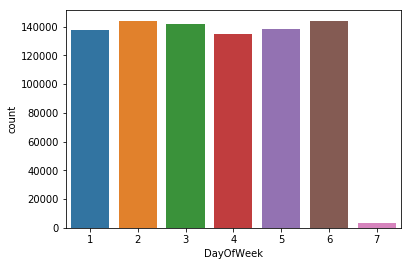

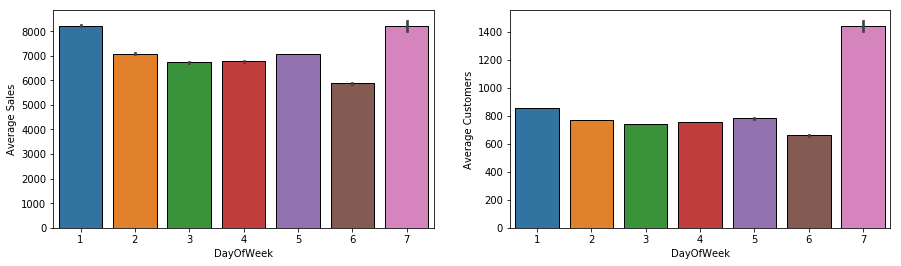

In [31]:
sns.countplot(x="DayOfWeek",data=train)
fig,(axis1,axis2)=plt.subplots(1,2,figsize=(15,4))
sns.barplot(x="DayOfWeek",y="Sales",data=train,edgecolor="black",ax=axis1)
axis1.set_ylabel("Average Sales")
sns.barplot(x='DayOfWeek',y='Customers',data=train,edgecolor='black',ax=axis2)
axis2.set_ylabel('Average Customers')

In [ ]:
#图1表示周日开门的店铺最少
#图2 可以看出周一和周日平均销售额最多，周六平均销售额最少
#图3可以看出周日营业店铺少，平均客户数量多，周一和周五客户数量相对多

In [ ]:
#Month和Sales关系

[Text(0,0,'1'),
 Text(0,0,'2'),
 Text(0,0,'3'),
 Text(0,0,'4'),
 Text(0,0,'5'),
 Text(0,0,'6'),
 Text(0,0,'7'),
 Text(0,0,'8'),
 Text(0,0,'9'),
 Text(0,0,'10'),
 Text(0,0,'11'),
 Text(0,0,'12')]

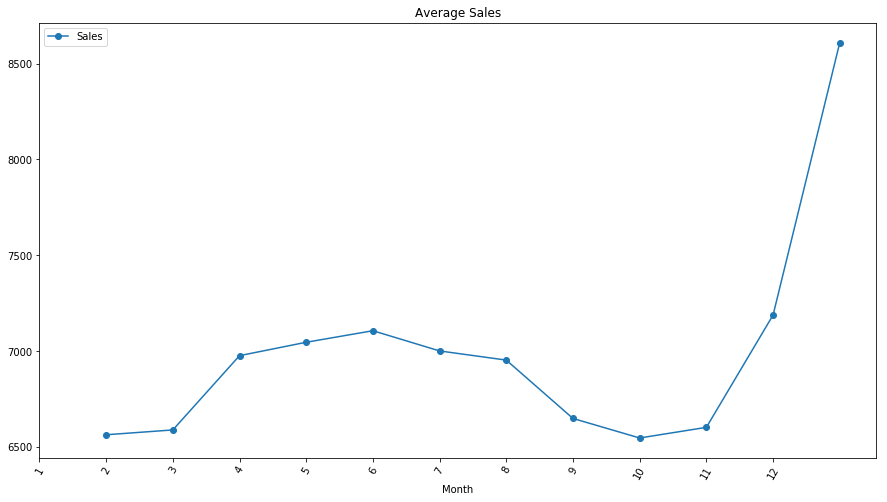

In [52]:
average_sales = train.groupby("Month")["Sales"].mean()

fig, (axis1) = plt.subplots(1,1,sharex=True, figsize=(15,8))

ax1 = average_sales.plot(legend=True,ax=axis1,marker='o', title="Average Sales")
ax1.set_xticks(range(len(average_sales)))
ax1.set_xticklabels(average_sales.index.tolist(), rotation=60)

#plt.savefig("Sales_Chart.png", bbox_inches="tight")

In [ ]:
#11，12月销售额大幅增加，可能与圣诞节有关
#3——7月份为销售旺季
#1，2，9月销售额最少

In [ ]:
#Year-Month和Sales关系

[Text(0,0,'-1000.0%'),
 Text(0,0,'0.0%'),
 Text(0,0,'1000.0%'),
 Text(0,0,'2000.0%'),
 Text(0,0,'3000.0%'),
 Text(0,0,'4000.0%'),
 Text(0,0,'5000.0%'),
 Text(0,0,'6000.0%'),
 Text(0,0,'7000.0%'),
 Text(0,0,'8000.0%')]

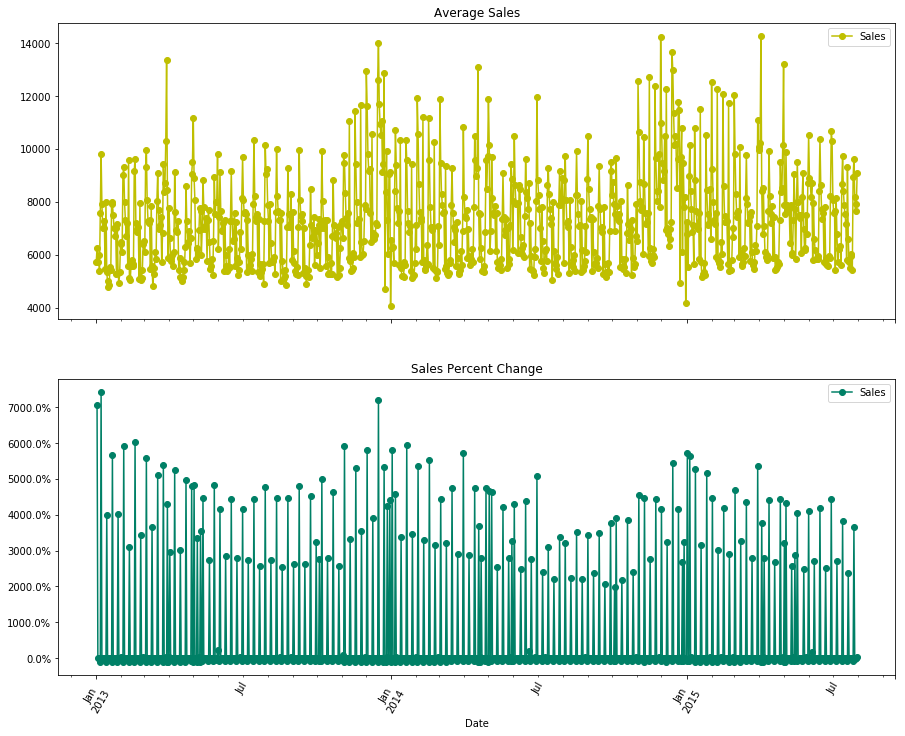

In [32]:
average_sales = train.groupby("Date")["Sales"].mean()
pct_change_sales = train.groupby("Date")["Sales"].sum().pct_change()

fig, (axis1, axis2) = plt.subplots(2,1,sharex=True, figsize=(15,12))

# Plot average sales over time(year-month)
ax1 = average_sales.plot(color='y',legend=True,ax=axis1,marker='o', title="Average Sales")
ax1.set_xticks(range(len(average_sales)))
ax1.set_xticklabels(average_sales.index.tolist(), rotation=60)

# Plot precent change for sales over time (year-month)
ax2 = pct_change_sales.plot(legend=True, ax=axis2, marker='o', rot=60, colormap="summer", title="Sales Percent Change")
vals = ax2.get_yticks()
ax2.set_yticklabels(["{:3.1f}%".format(x*100) for x in vals])

#plt.savefig("Sales_Chart.png", bbox_inches="tight")

In [ ]:
#销售突出时间：2013-12，2014-12
#销售增长超过15%时间：2013-03，2013-07，2013-12，2014-12，2015-03
#销售负增长10%时间：2013-04，2013-09，2014-01，2015-02

In [ ]:
#Year-Month和Customers关系

Text(0.5,1,'Percentage Change of Customers per Month')

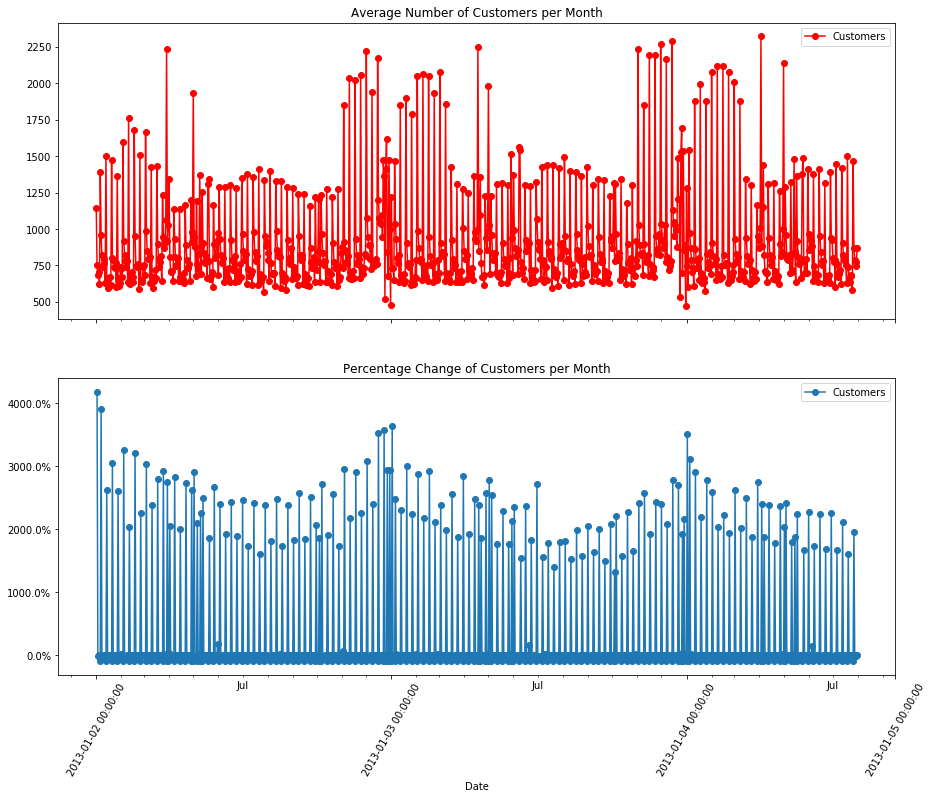

In [33]:
average_customers=train.groupby("Date")["Customers"].mean()
pct_change_customers=train.groupby("Date")["Customers"].sum().pct_change()
fig,(axis1,axis2)=plt.subplots(2,1,figsize=(15,12),sharex=True)
ax1=average_customers.plot(color='r',legend=True,marker='o',ax=axis1)
ax1.set_xticks(range(len(average_customers)))
ax1.set_title("Average Number of Customers per Month")
ax2=pct_change_customers.plot(legend=True,marker='o',ax=axis2)
vals=ax2.get_yticks()
ax2.set_yticklabels(["{:3.1f}%".format(x*100)for x in vals])
ax2.set_xticklabels(pct_change_customers.index.tolist(),rotation=60)
ax2.set_title("Percentage Change of Customers per Month")

In [ ]:
#客户数量高峰期：2013-12，2014-12
#客户数量保持在600-800之间
#客户数量增长幅度较大时间：2013-03，2013-07，2013-12，2014-03，2014-12，2015-03，与销售额增长呈现相关性
#客户数量负增长在10%时间：2013-09，2014-01

In [ ]:
#Promo和Sales，Customers关系

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Average Customers')

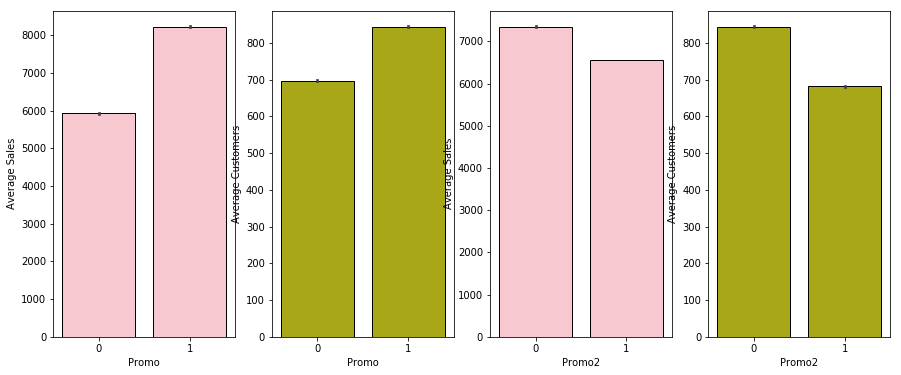

In [34]:
fig,(axis1,axis2,axis3,axis4)=plt.subplots(1,4,figsize=(15,6))
sns.barplot(x="Promo",y="Sales",data=train,edgecolor="black",color='pink',ax=axis1)
axis1.set_ylabel("Average Sales")
sns.barplot(x="Promo",y="Customers",data=train,edgecolor='black',color='y',ax=axis2)
axis2.set_ylabel("Average Customers")
sns.barplot(x="Promo2",y="Sales",data=train,edgecolor="black",color='pink',ax=axis3)
axis3.set_ylabel("Average Sales")
sns.barplot(x="Promo2",y="Customers",data=train,edgecolor='black',color='y',ax=axis4)
axis4.set_ylabel("Average Customers")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


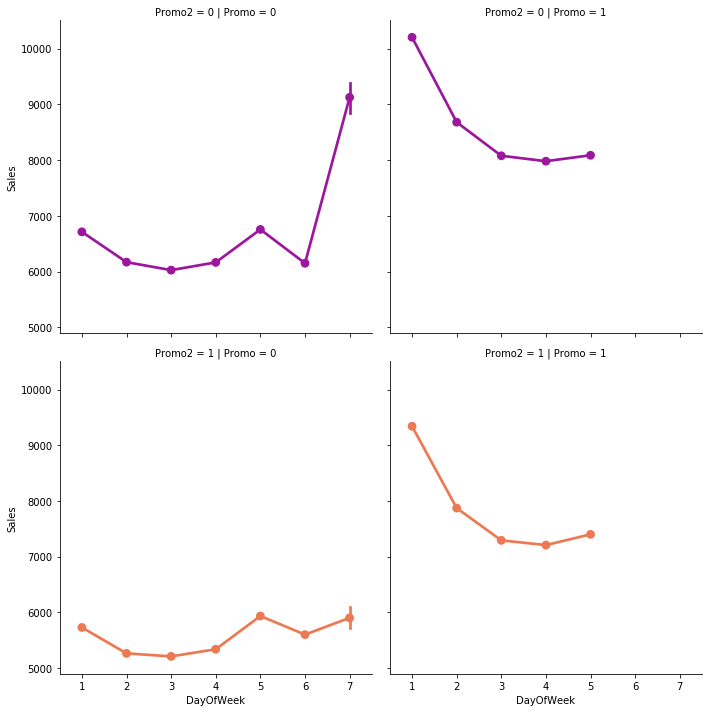

In [35]:
sns.factorplot(data=train,x="DayOfWeek",y="Sales",col="Promo",row="Promo2",hue="Promo2",palette="plasma")

In [ ]:
#做促销比不促销的平均销售额多2000
#做促销比不促销的客户多100以上

In [ ]:
#StateHoliday和Sales关系

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Average Sales')

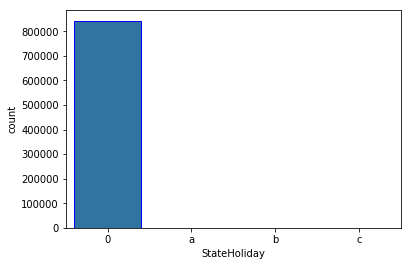

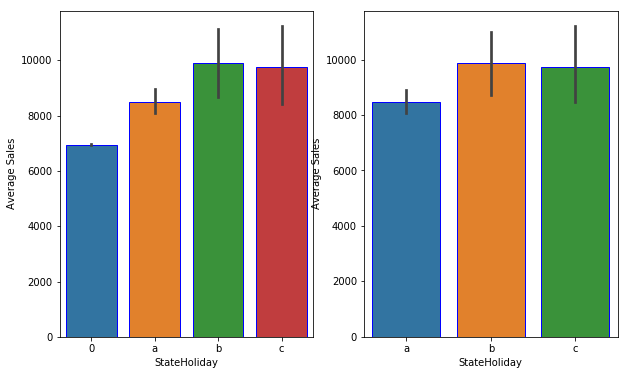

In [36]:
sns.countplot(x="StateHoliday",edgecolor='blue',data=train)
fig,(axis1,axis2)=plt.subplots(1,2,figsize=(10,6))
sns.barplot(x="StateHoliday",y="Sales",data=train,edgecolor="blue",ax=axis1)
axis1.set_ylabel("Average Sales")
sns.barplot(x="StateHoliday",y="Sales",data=train[(train["StateHoliday"]!='0')&(train["Sales"]>0)],edgecolor="blue",ax=axis2)
axis2.set_ylabel("Average Sales")

In [ ]:
#在a、b、c州假期平均销售额比不在州假期高
#b类州假期平均销售额最高，接近10000

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Average Customers')

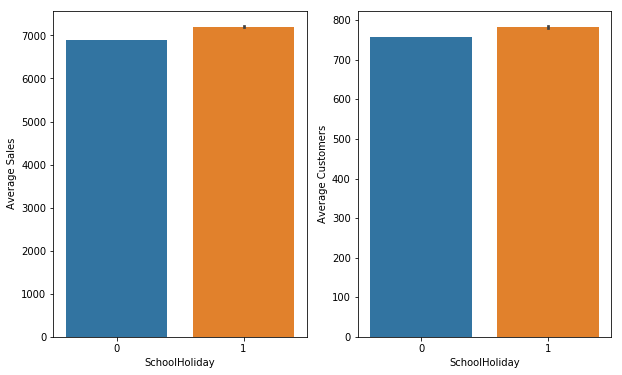

In [37]:
#SchoolHoliday和Sales关系
fig,(axis1,axis2)=plt.subplots(1,2,figsize=(10,6))
sns.barplot(x="SchoolHoliday",y="Sales",data=train,ax=axis1)
axis1.set_ylabel("Average Sales")
sns.barplot(x="SchoolHoliday",y="Customers",data=train,ax=axis2)
axis2.set_ylabel("Average Customers")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


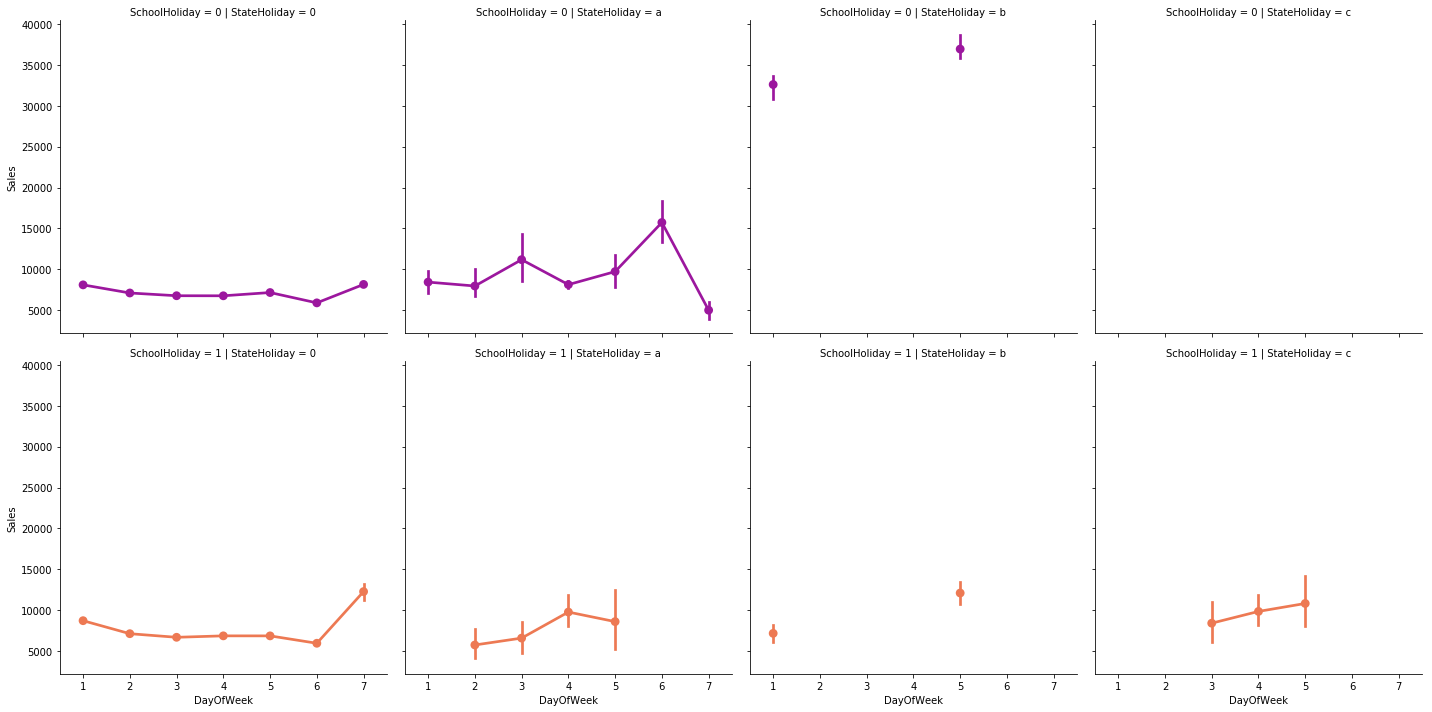

In [38]:
sns.factorplot(data=train,x="DayOfWeek",y="Sales",col="StateHoliday",row="SchoolHoliday",hue="SchoolHoliday",palette="plasma")

In [ ]:
#在学校假期的时候平均销售额和平均客户数量相对多一些，但是不明显，说明消费群体不集中在学生群体

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Average Customers')

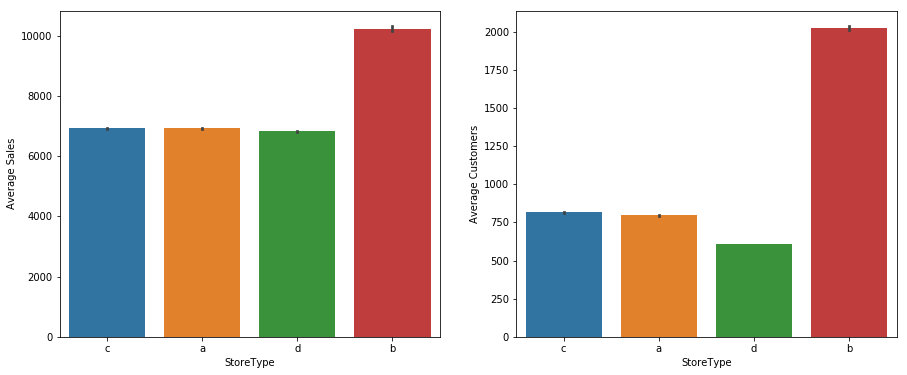

In [39]:
#StoreType和Sales、Customers关系
fig,(axis1,axis2)=plt.subplots(1,2,figsize=(15,6))
sns.barplot(x="StoreType",y="Sales",data=train,ax=axis1)
axis1.set_ylabel("Average Sales")
sns.barplot(x="StoreType",y="Customers",data=train,ax=axis2)
axis2.set_ylabel("Average Customers")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


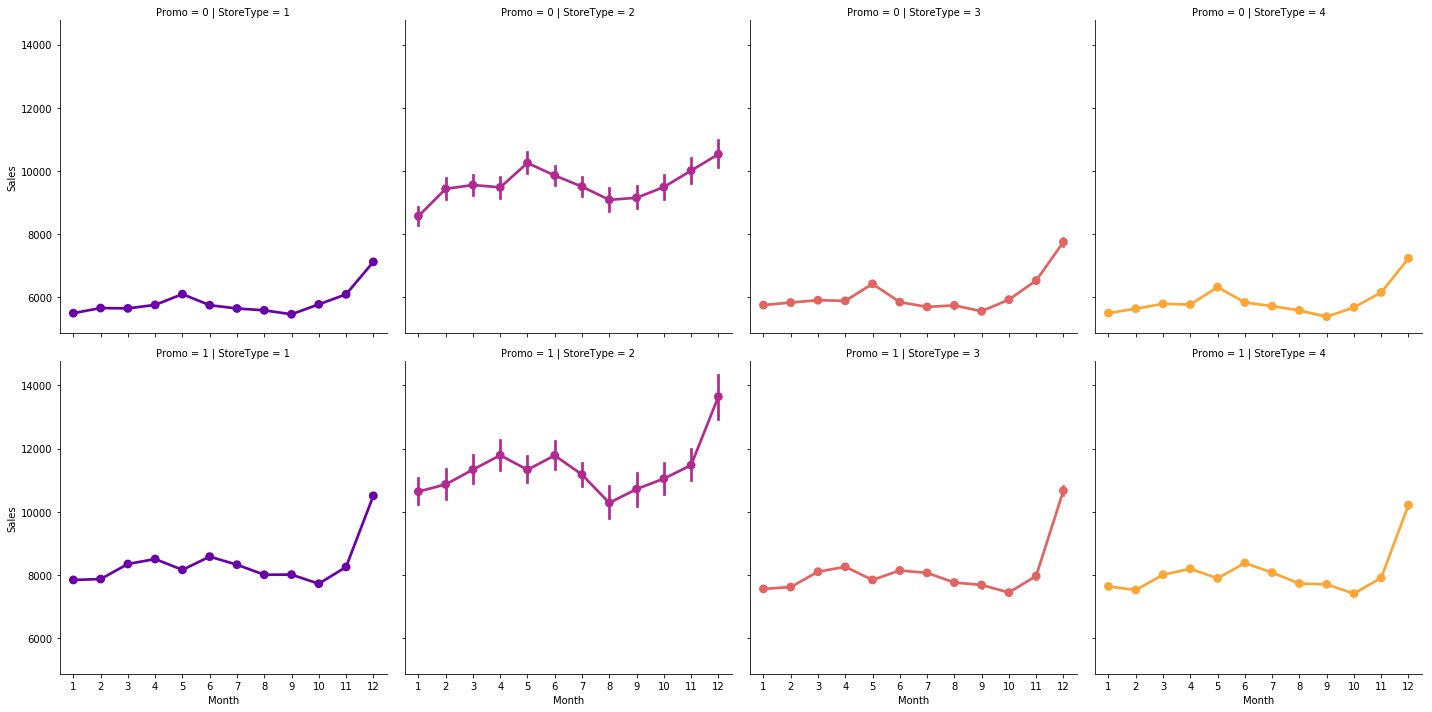

In [50]:
sns.factorplot(data=train,x="Month",y="Sales",col="StoreType",palette="plasma",hue="StoreType",row="Promo",color='c')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


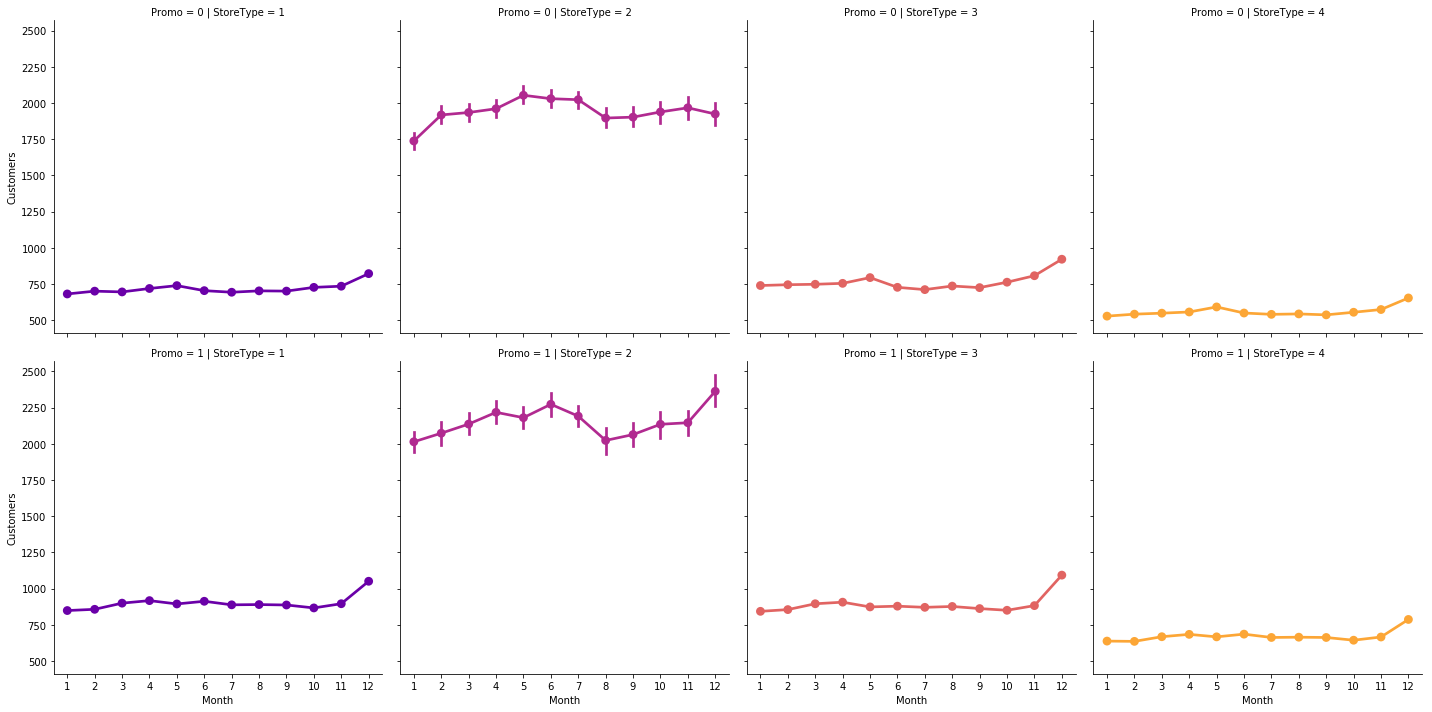

In [51]:
sns.factorplot(data=train,x="Month",y="Customers",col="StoreType",palette="plasma",hue="StoreType",row="Promo",color='c')

In [ ]:
#b类店铺类型平均销售额最高接近10000，客户数量也最多接近2000
#a,c,d类店铺类型销售额基本持平，d类店铺客户数量最少，仅有600多

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Average Customers')

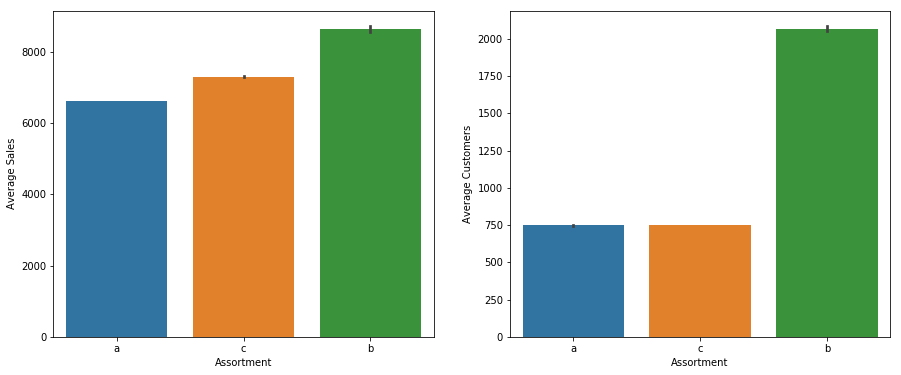

In [40]:
#Assortment和Sales、Customers关系
fig,(axis1,axis2)=plt.subplots(1,2,figsize=(15,6))
sns.barplot(x="Assortment",y="Sales",data=train,ax=axis1)
axis1.set_ylabel("Average Sales")
sns.barplot(x="Assortment",y="Customers",data=train,ax=axis2)
axis2.set_ylabel("Average Customers")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


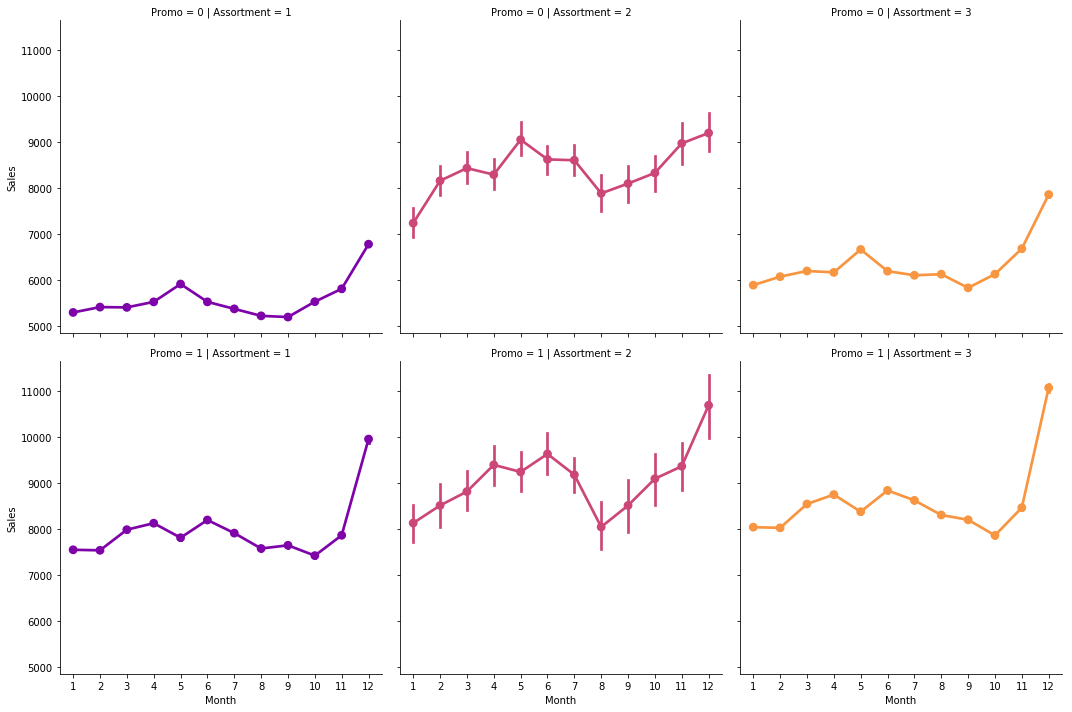

In [48]:
#Assortment、Promo和Sales关系
sns.factorplot(data=train,x="Month",y="Sales",col="Assortment",palette="plasma",hue="Assortment",row="Promo",color='c')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


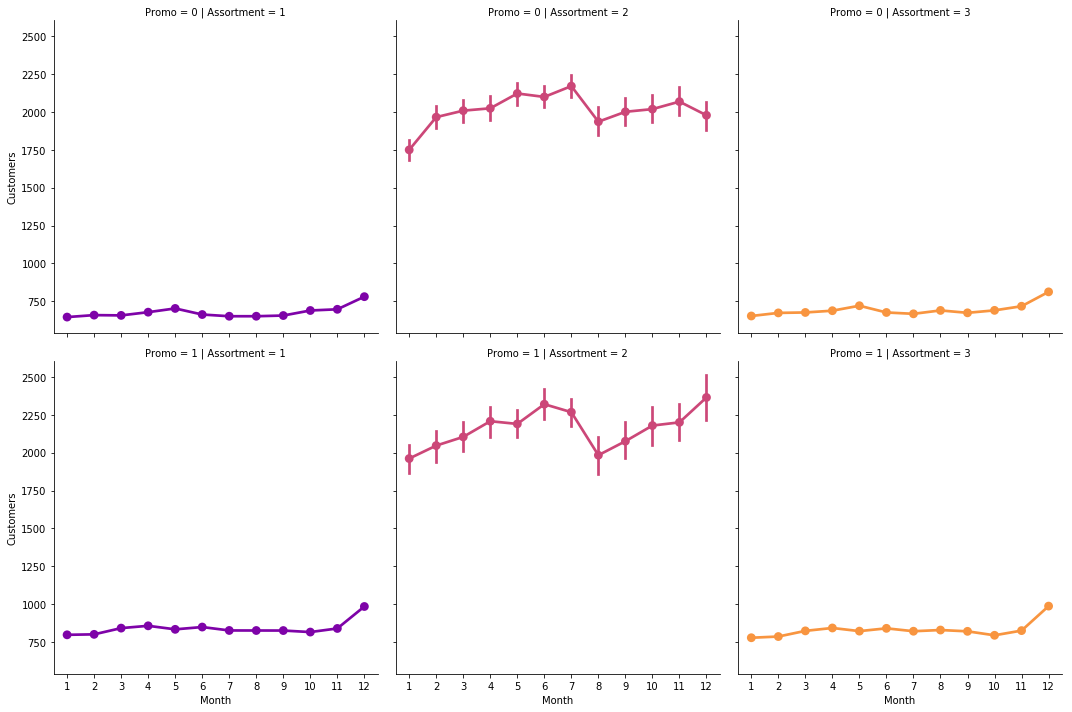

In [49]:
sns.factorplot(data=train,x="Month",y="Customers",col="Assortment",palette="plasma",hue="Assortment",row="Promo",color='c')

In [ ]:
#Assortment分类为b的店铺平均销售额和客户数量最多，尤其客户数量是其他两类的三倍

Text(0,0.5,'Count')

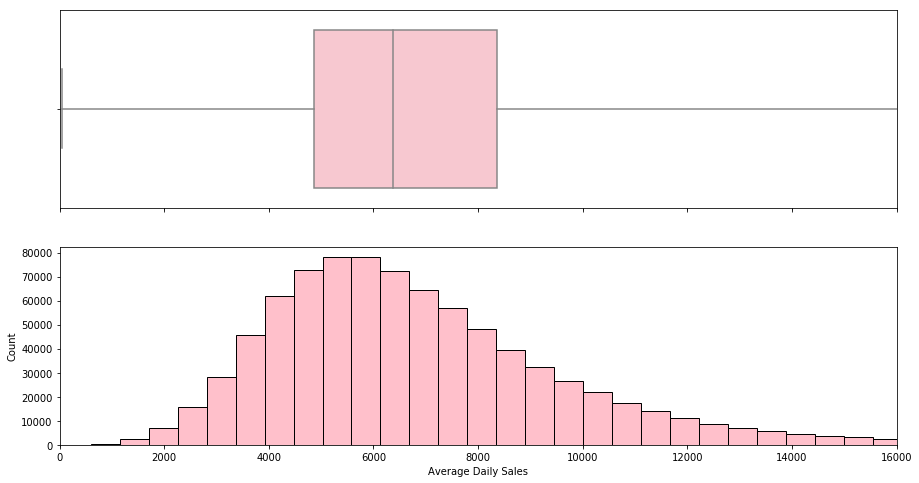

In [41]:
#Sales分布
fig,(axis1,axis2)=plt.subplots(2,1,figsize=(15,8),sharex=True)
sns.boxplot([train["Sales"]],whis=np.inf,ax=axis1,color='pink')
train["Sales"].plot(kind='hist',edgecolor="black",bins=75,xlim=(0,16000),ax=axis2,color='pink')
plt.xlabel("Average Daily Sales")
plt.ylabel("Count")


In [ ]:
#店铺的每日销售额集中在4000-8000之间

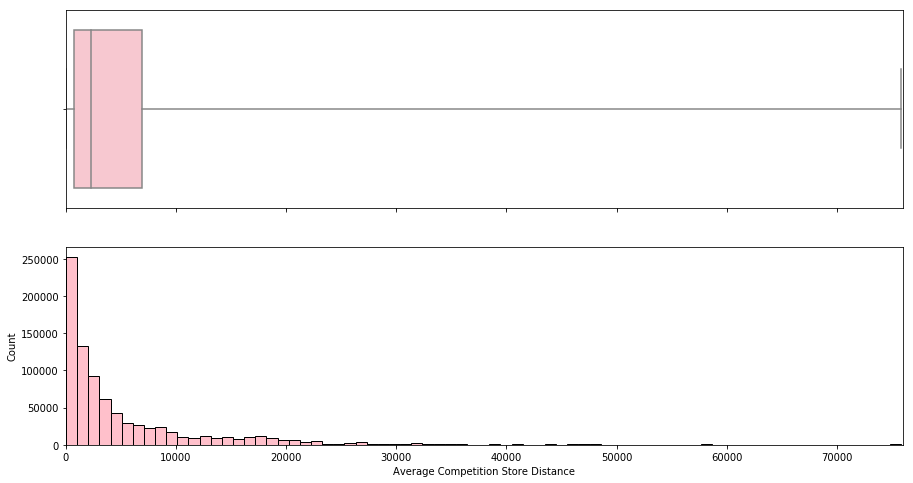

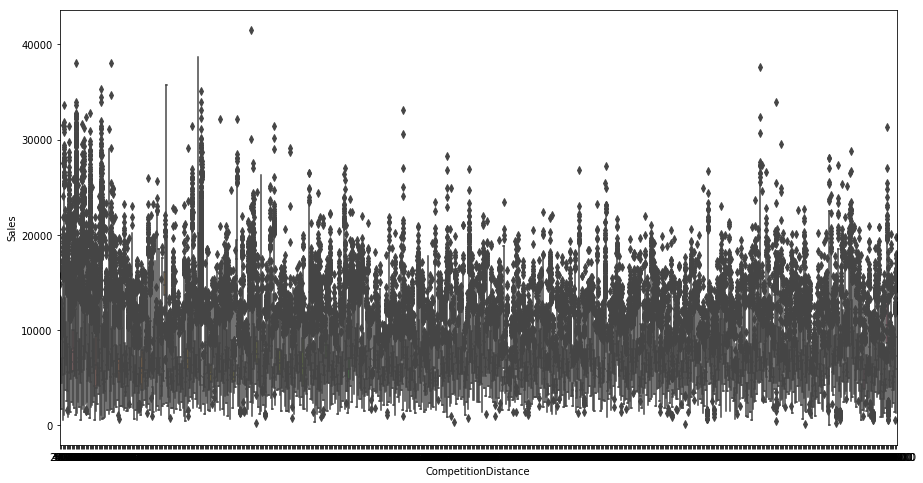

In [42]:
#CompetitionDistance和Sales关系
fig,(axis1,axis2)=plt.subplots(2,1,figsize=(15,8),sharex=True)
sns.boxplot([train["CompetitionDistance"]],whis=np.inf,ax=axis1,color='pink')
train["CompetitionDistance"].plot(kind='hist',edgecolor="black",bins=75,xlim=(20,76000),ax=axis2,color='pink')
plt.xlabel("Average Competition Store Distance")
plt.ylabel("Count")
fig,(axis3)=plt.subplots(1,1,figsize=(15,8))
sns.boxplot(x="CompetitionDistance",y="Sales",data=train,ax=axis3)

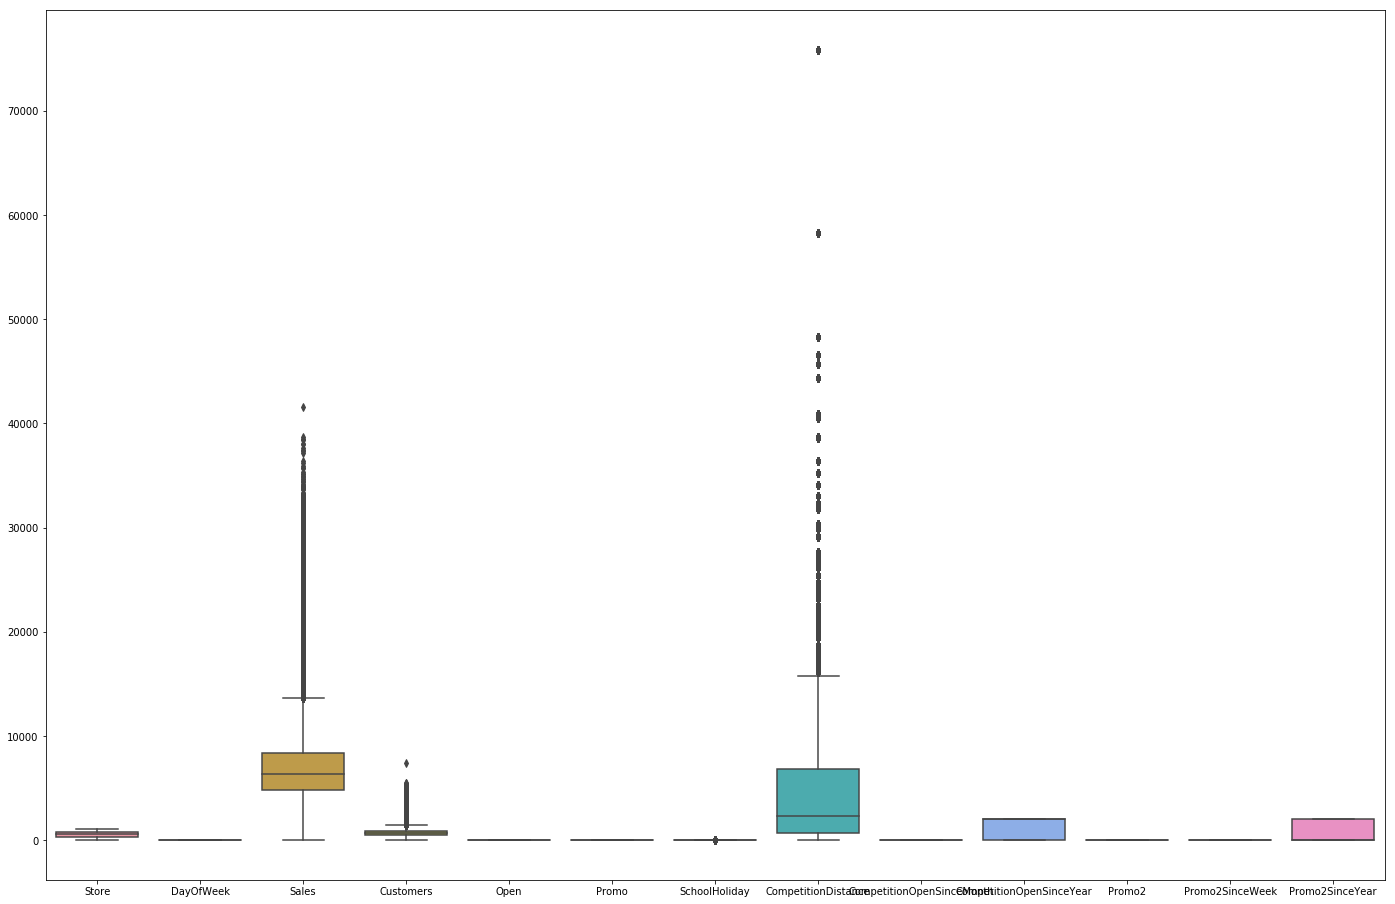

In [43]:
f,ax=plt.subplots(1,figsize=(24,16))
sns.boxplot(data=train.drop(['Date'],axis=1))

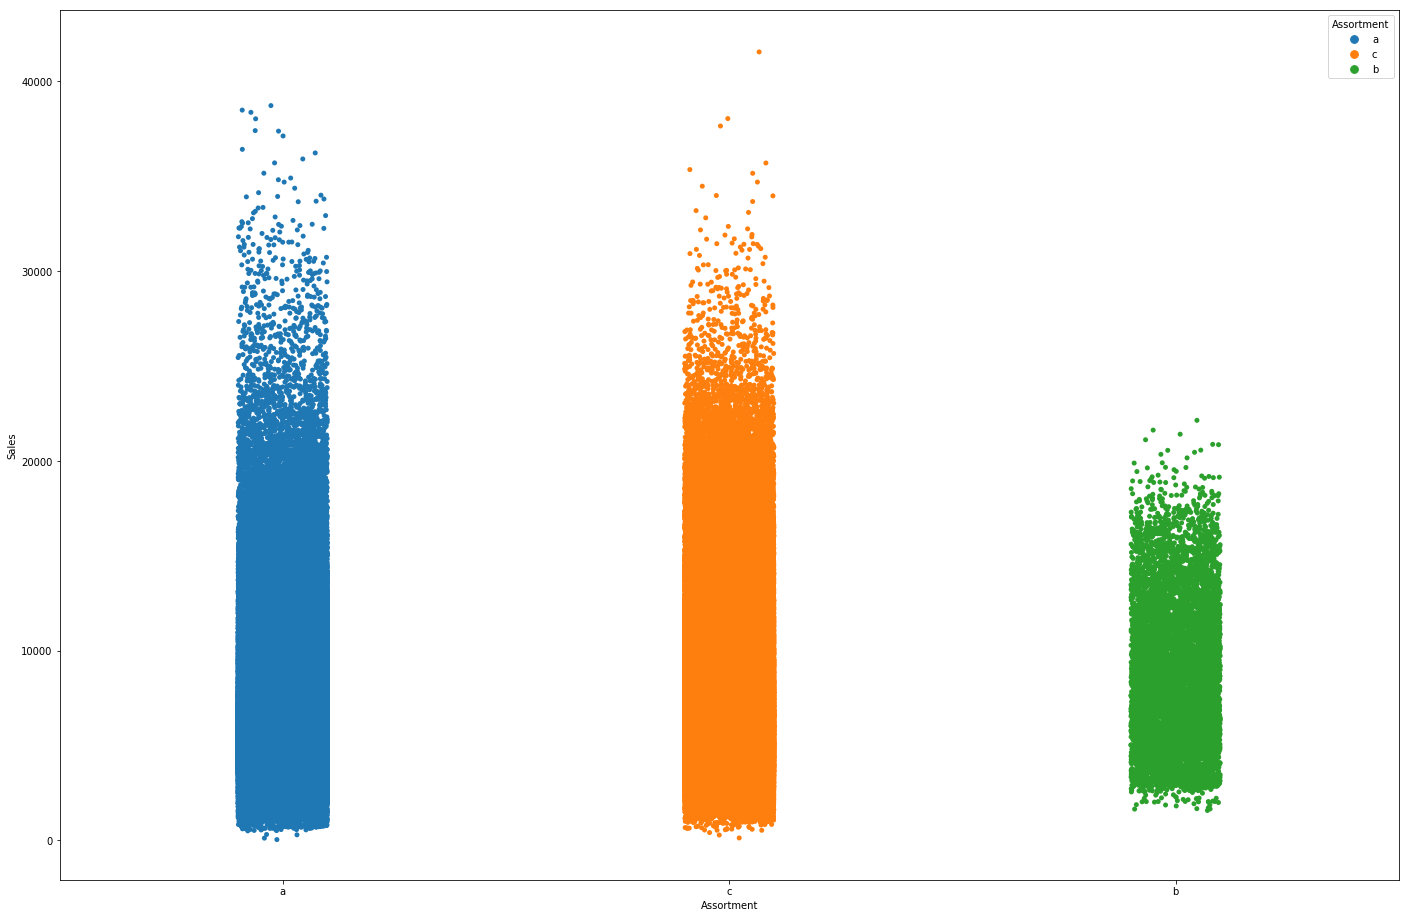

In [44]:
f,ax=plt.subplots(1,figsize=(24,16))
sns.stripplot(x='Assortment',y='Sales',hue='Assortment',data=train,jitter=True,edgecolor="white",ax=ax)

Index(['a', 'b', 'c', 'd'], dtype='object', name='StoreType')

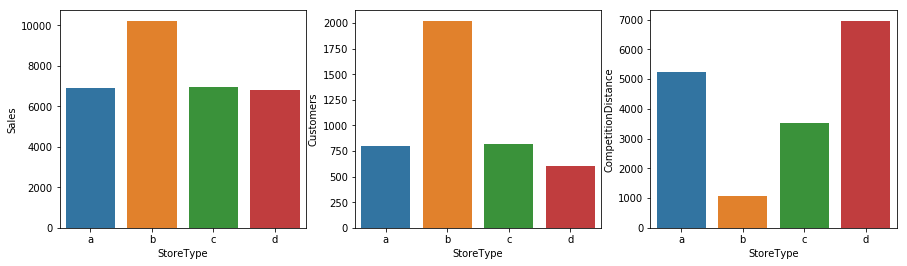

In [45]:
average_storetype=train.groupby('StoreType')['Sales', 'Customers', 'CompetitionDistance'].mean()

fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,4))
sns.barplot(average_storetype.index, average_storetype['Sales'], ax=axis1)
sns.barplot(average_storetype.index, average_storetype['Customers'], ax=axis2)
sns.barplot(average_storetype.index, average_storetype['CompetitionDistance'], ax=axis3)

average_storetype.index

In [ ]:
#特征工程

In [46]:
def features_create(data):
    
    
    mappings = {'0':0, 'a':1, 'b':2, 'c':3, 'd':4}
    data.StoreType.replace(mappings, inplace=True)
    data.Assortment.replace(mappings, inplace=True)
    data.StateHoliday.replace(mappings, inplace=True)
    
    
    data['Year'] = data.Date.dt.year
    data['Month'] = data.Date.dt.month
    data['Day'] = data.Date.dt.day
    data['DayOfWeek'] = data.Date.dt.dayofweek
    data['WeekOfYear'] = data.Date.dt.weekofyear
    
    
    
    data['CompetitionOpen'] = 12 * (data.Year - data.CompetitionOpenSinceYear) +         (data.Month - data.CompetitionOpenSinceMonth)
    data['PromoOpen'] = 12 * (data.Year - data.Promo2SinceYear) +         (data.WeekOfYear - data.Promo2SinceWeek) / 4.0
    data['CompetitionOpen'] = data.CompetitionOpen.apply(lambda x: x if x > 0 else 0)        
    data['PromoOpen'] = data.PromoOpen.apply(lambda x: x if x > 0 else 0)
    
    
  
    month2str = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
    data['monthStr'] = data.Month.map(month2str)
    data.loc[data.PromoInterval == 0, 'PromoInterval'] = ''
    data['IsPromoMonth'] = 0
    for interval in data.PromoInterval.unique():
        if interval != '':
            for month in interval.split(','):
                data.loc[(data.monthStr == month) & (data.PromoInterval == interval), 'IsPromoMonth'] = 1

    return data

In [47]:
features_create(train)
features_create(test)
print('Features creation finished')

Features creation finished


In [53]:
train = train.sort_values(['Date'],ascending = False)
valid = train[:6*7*1115]
train = train[6*7*1115:]

In [54]:
train.drop(['PromoInterval'],axis=1,inplace=True)
#test.drop(['PromoInterval'],axis=1,inplace=True)

In [55]:
train.drop(['Date'],axis=1,inplace=True)
#test.drop(['Date'],axis=1,inplace=True)

In [56]:
train.drop(['Customers'],axis=1,inplace=True)
#test.drop(['Id'],axis=1,inplace=True)

In [57]:
train.drop(['Open'],axis=1,inplace=True)
#test.drop(['Open'],axis=1,inplace=True)

In [58]:
train.drop(['monthStr'],axis=1,inplace=True)
#test.drop(['monthStr'],axis=1,inplace=True)

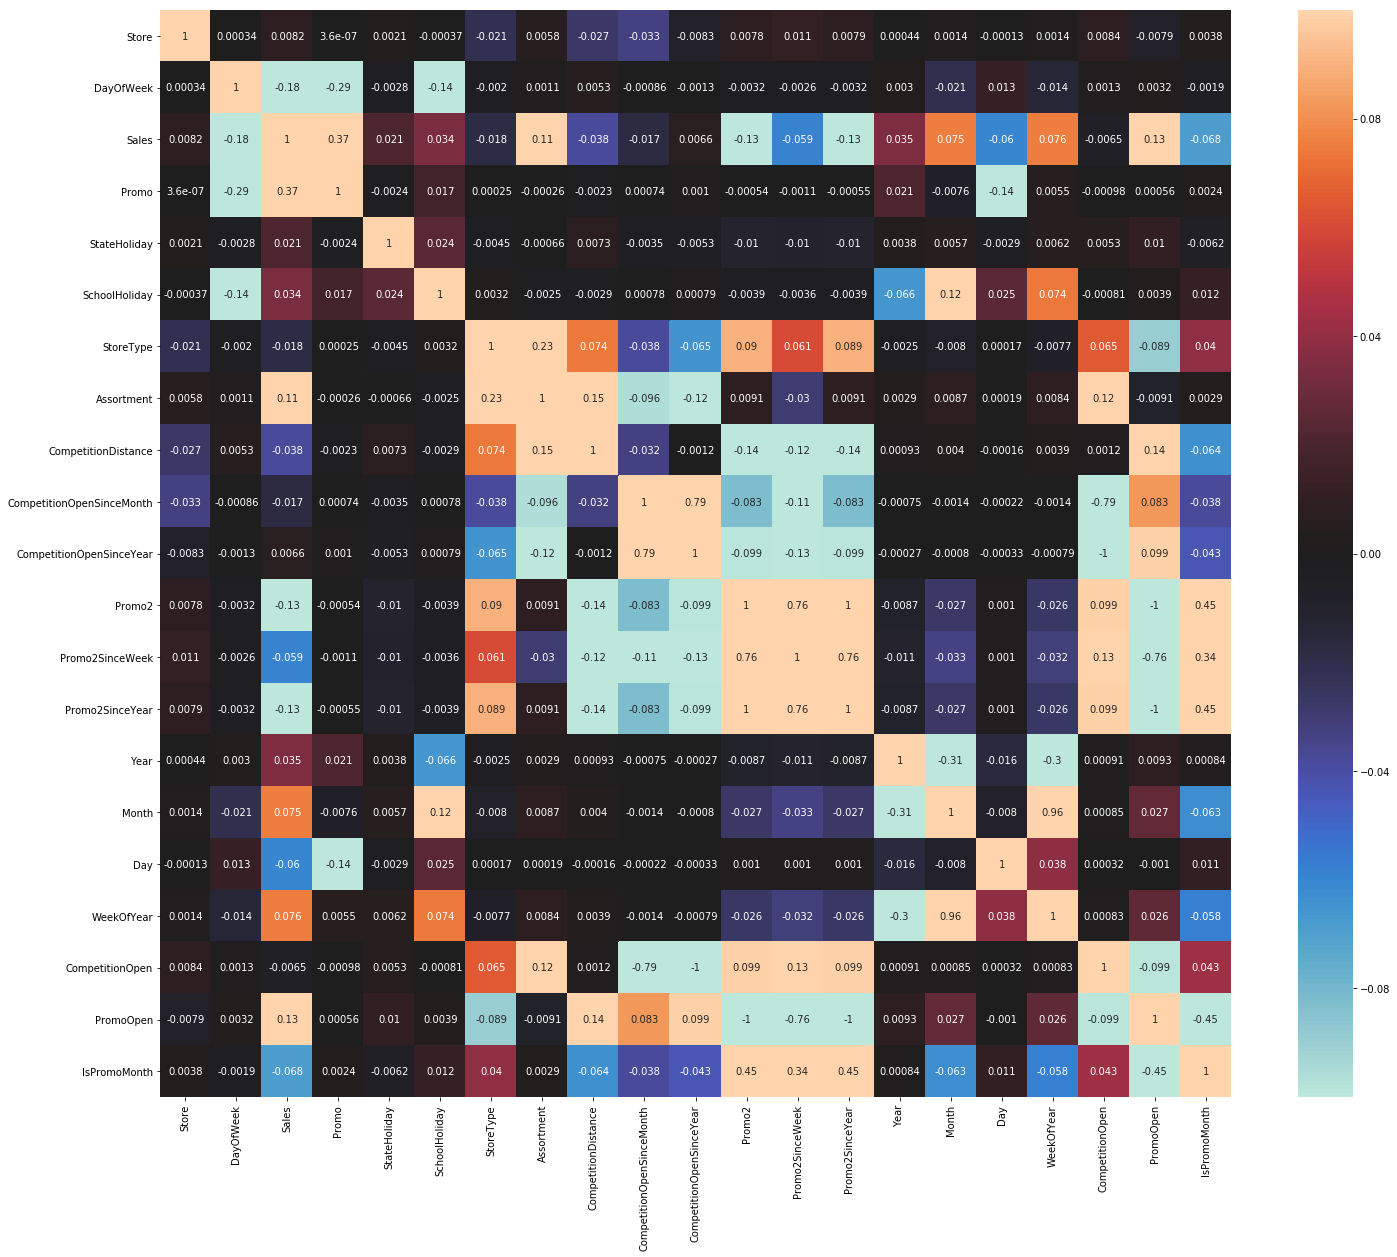

In [59]:
plt.subplots(figsize=(24,20))
sns.heatmap(train.corr(),annot=True, vmin=-0.1, vmax=0.1,center=0)

In [84]:
#XGBoost模型训练

In [60]:
def rmspe(y, yhat):
    return np.sqrt(np.mean((yhat / y - 1) ** 2))  

In [61]:
def rmspe_xg(yhat, y):
    y = np.exp(y.get_label())
    yhat = np.exp(yhat)
    return "rmspe", rmspe(y, yhat)

In [62]:
#XGBoost模型—线性回归参数设置
params={
'booster':'gbtree',
'objective': 'reg:linear', #线性回归问题
'max_depth':13, # 构建树的深度，越大越容易过拟合
'lambda':2,  # 控制模型复杂度的权重值的L2正则化项参数，参数越大，模型越不容易过拟合。
'subsample':0.7, # 随机采样训练样本
'colsample_bytree':0.7, # 生成树时进行的列采样
'min_child_weight':3, 
# 这个参数默认是 1，是每个叶子里面 h 的和至少是多少，对正负样本不均衡时的 0-1 分类而言
#，假设 h 在 0.01 附近，min_child_weight 为 1 意味着叶子节点中最少需要包含 100 个样本。
#这个参数非常影响结果，控制叶子节点中二阶导的和的最小值，该参数值越小，越容易 overfitting。 
'silent':0 ,#设置成1则没有运行信息输出，最好是设置为0.
'eta': 0.3, # 如同学习率
'seed':10,
'nthread':7,# cpu 线程数
#'eval_metric': 'auc'
}
plst = list(params.items())
num_rounds = 100# 迭代次数



In [63]:
print("Train a XGBoost model")
#x_train, x_valid = train_test_split(train, test_size=0.2, random_state=10)
#x_train, x_valid=cross_validation.train_test_split(train,test_size=0.2,random_state=10)
x_train=train.drop(['Sales'],axis=1)
x_valid=train.drop(['Sales'],axis=1)
y_train = np.log(train.Sales)
y_valid = np.log(train.Sales)
dtrain = xgb.DMatrix(x_train, y_train)
dvalid = xgb.DMatrix(x_valid, y_valid)



Train a XGBoost model


In [64]:
x_test=test.drop(['Id','Date','Open','PromoInterval','monthStr'],axis=1)

In [65]:
#记录程序运行时间
start_time=time.time()

In [66]:
watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
gbm = xgb.train(params, dtrain, num_rounds, evals=watchlist, early_stopping_rounds=100,feval=rmspe_xg, verbose_eval=True)
 

[22:15:41] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=9
[0]	train-rmse:5.79275	eval-rmse:5.79275	train-rmspe:0.996657	eval-rmspe:0.996657
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 100 rounds.
[22:15:44] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 140 extra nodes, 0 pruned nodes, max_depth=13
[1]	train-rmse:4.06241	eval-rmse:4.06241	train-rmspe:0.981312	eval-rmspe:0.981312
[22:15:47] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 374 extra nodes, 0 pruned nodes, max_depth=13
[2]	train-rmse:2.85318	eval-rmse:2.85318	train-rmspe:0.937934	eval-rmspe:0.937934
[22:15:50] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 466 extra nodes, 0 pruned nodes, max_depth=1

[22:18:14] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6766 extra nodes, 0 pruned nodes, max_depth=13
[34]	train-rmse:0.106908	eval-rmse:0.106908	train-rmspe:0.13242	eval-rmspe:0.13242
[22:18:21] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4818 extra nodes, 0 pruned nodes, max_depth=13
[35]	train-rmse:0.105497	eval-rmse:0.105497	train-rmspe:0.130733	eval-rmspe:0.130733
[22:18:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6560 extra nodes, 0 pruned nodes, max_depth=13
[36]	train-rmse:0.103961	eval-rmse:0.103961	train-rmspe:0.128869	eval-rmspe:0.128869
[22:18:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4834 extra nodes, 0 pruned nodes, max_depth=13
[37]	train-rmse:0.102935	eval-rmse:0.102935	train-rmspe:0.127179	eval-rmspe:0.127179
[22:18:38] C:\Users\Administrator\Desktop\xgbo

[68]	train-rmse:0.084014	eval-rmse:0.084014	train-rmspe:0.098506	eval-rmspe:0.098506
[22:21:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 5816 extra nodes, 0 pruned nodes, max_depth=13
[69]	train-rmse:0.083558	eval-rmse:0.083558	train-rmspe:0.097897	eval-rmspe:0.097897
[22:21:11] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 7824 extra nodes, 0 pruned nodes, max_depth=13
[70]	train-rmse:0.083048	eval-rmse:0.083048	train-rmspe:0.09544	eval-rmspe:0.09544
[22:21:17] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 5936 extra nodes, 0 pruned nodes, max_depth=13
[71]	train-rmse:0.082762	eval-rmse:0.082762	train-rmspe:0.095157	eval-rmspe:0.095157
[22:21:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4326 extra nodes, 0 pruned nodes, max_depth=13
[72]	train-rmse:0.08238	eval-rmse:0.08238	trai

In [67]:
cost_time=time.time()-start_time
print("xgboost success!",'\n',"cost time:",cost_time,"(s)......")

xgboost success! 
 cost time: 494.1830630302429 (s)......


In [68]:
print("Validating")
x_valid.sort_index(inplace=True)
y_valid.sort_index(inplace=True)
yhat = gbm.predict(xgb.DMatrix(x_valid))
error = rmspe(np.exp(y_valid), np.exp(yhat))
print('RMSPE: {:.6f}'.format(error))

Validating
RMSPE: 0.081856


Mean Squared Error: 0.005528550403082787
R2 Error: 0.9695010611621038
Median Absolute Error: 0.04349681132121841
Mean: 0.05469884634102282
Variance(sigma2): 0.0025365866120440174
Sigma: 0.05036453724640005


Text(0.5,1,'Distribution of the Absolute Error')

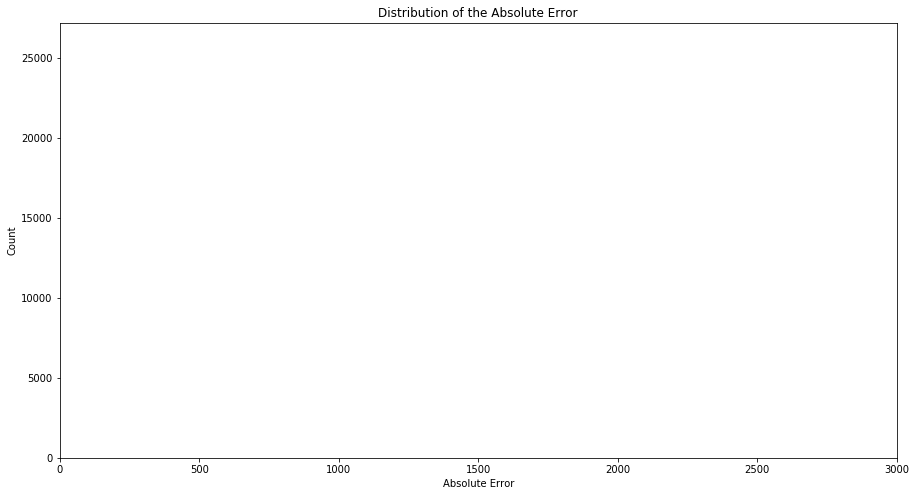

In [72]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import median_absolute_error

mse = mean_squared_error(y_valid, yhat)
r2 = r2_score(y_valid, yhat)
mae = median_absolute_error(y_valid, yhat)

# Calculate the mean absolute error for all `y_v`
pred_dist = abs((y_valid)-(yhat))

# Get the statistics on `pred_dist`
mean = np.mean(pred_dist)
variance = np.var(pred_dist)
sigma = np.sqrt(variance)
print("Mean Squared Error:", mse)
print("R2 Error:", r2)
print("Median Absolute Error:", mae)
print("Mean:", mean)
print("Variance(sigma2):", variance)
print("Sigma:", sigma)

# Plot the distribution of the mean absolute error
fig, ax = plt.subplots(1, 1, figsize=(15,8))
plt.hist(pred_dist, bins=1000)
plt.xlim([0,3000])
plt.xlabel("Absolute Error")
plt.ylabel("Count")
plt.title("Distribution of the Absolute Error")



In [94]:
#读入预测数据
df = pd.DataFrame(data = y_valid)
df['Prediction']=yhat
df = pd.merge(x_valid,df, left_index= True, right_index=True)
df['Ratio'] = df.Prediction/df.Sales
df['Error'] =abs(df.Ratio-1)
df['Weight'] = df.Sales/df.Prediction
df.head()


,Store,DayOfWeek,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,...,Day,WeekOfYear,CompetitionOpen,PromoOpen,IsPromoMonth,Sales,Prediction,Ratio,Error,Weight
0,1,4,1,0,1,3,1,1270.0,9.0,2008.0,...,31,31,82.0,24187.75,0,8.568456,8.618054,1.005788,0.005788,0.994245
1,1,3,1,0,1,3,1,1270.0,9.0,2008.0,...,30,31,82.0,24187.75,0,8.521185,8.569290,1.005645,0.005645,0.994386
2,1,2,1,0,1,3,1,1270.0,9.0,2008.0,...,29,31,82.0,24187.75,0,8.472614,8.514886,1.004989,0.004989,0.995036
3,1,1,1,0,1,3,1,1270.0,9.0,2008.0,...,28,31,82.0,24187.75,0,8.519391,8.609029,1.010522,0.010522,0.989588
4,1,0,1,0,1,3,1,1270.0,9.0,2008.0,...,27,31,82.0,24187.75,0,8.716372,8.708149,0.999057,0.000943,1.000944


Mean Ratio of predition and real sales data is 1.0004797230526028: store all
Mean Ratio of predition and real sales data is 0.999958108482998: store 1000
Mean Ratio of predition and real sales data is 1.004688259039867: store 220
Mean Ratio of predition and real sales data is 1.0093858260835107: store 841


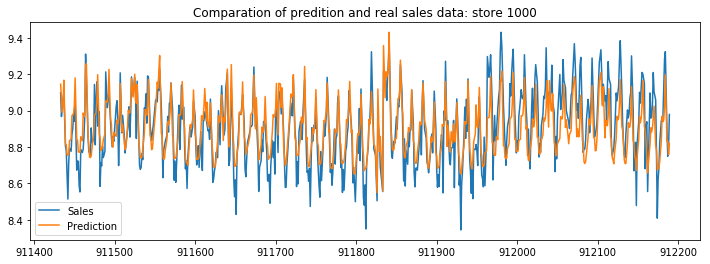

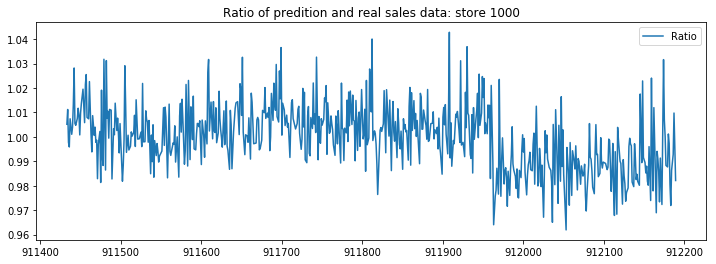

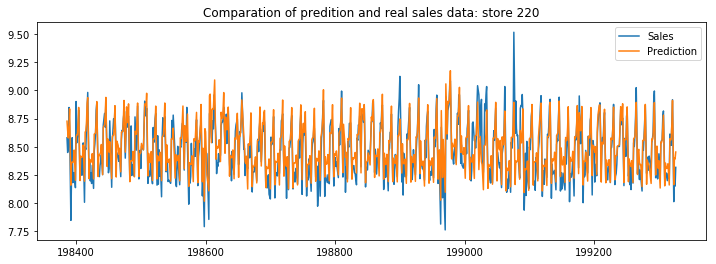

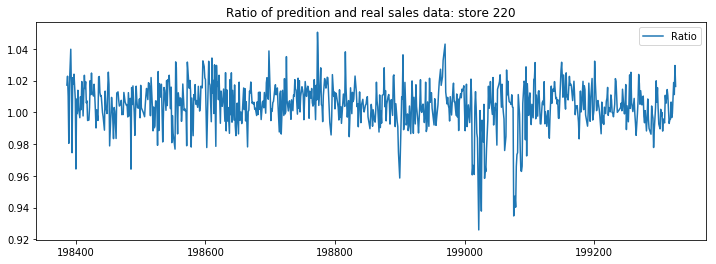

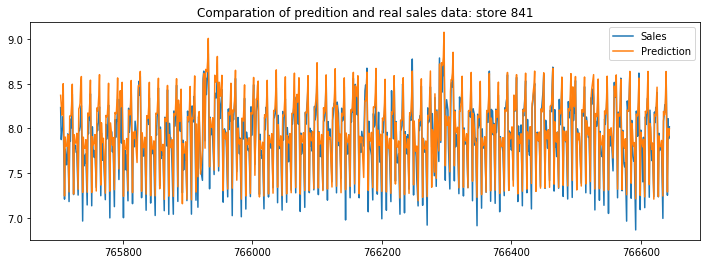

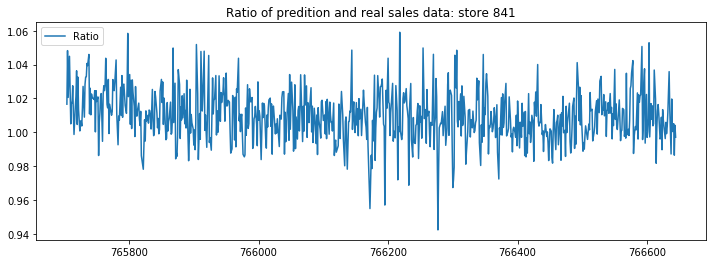

In [95]:
col_1 = ['Sales','Prediction']
col_2 = ['Ratio']
L=np.random.randint( low=1,high = 1115, size = 3 ) 
print('Mean Ratio of predition and real sales data is {}: store all'.format(df.Ratio.mean()))
for i in L:
    
    s1 = pd.DataFrame(df[df['Store']==i],columns = col_1)
    s2 = pd.DataFrame(df[df['Store']==i],columns = col_2)
    s1.plot(title = 'Comparation of predition and real sales data: store {}'.format(i),figsize=(12,4))
    s2.plot(title = 'Ratio of predition and real sales data: store {}'.format(i),figsize=(12,4))
    print('Mean Ratio of predition and real sales data is {}: store {}'.format(s2.Ratio.mean(),i))

In [96]:
df.sort_values(['Error'],ascending=False,inplace= True)
df[:10]

,Store,DayOfWeek,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,...,Day,WeekOfYear,CompetitionOpen,PromoOpen,IsPromoMonth,Sales,Prediction,Ratio,Error,Weight
593437,652,5,0,0,0,1,1,20390.0,0.0,0.0,...,22,47,24179.0,24179.75,0,3.828641,8.148388,2.128271,1.128271,0.469865
997251,1093,0,1,0,0,3,3,10450.0,6.0,2009.0,...,3,23,48.0,24161.75,0,4.890349,9.161922,1.873470,0.873470,0.533769
818107,898,5,0,0,0,1,1,18540.0,0.0,0.0,...,31,5,24181.0,24181.25,0,4.820282,7.821629,1.622650,0.622650,0.616276
158356,175,0,1,0,0,3,1,4130.0,0.0,0.0,...,26,35,24164.0,24164.75,0,5.755742,8.939318,1.553113,0.553113,0.643868
124619,137,5,0,0,0,1,1,1730.0,7.0,2015.0,...,19,3,0.0,0.00,1,5.693732,8.511847,1.494950,0.494950,0.668919
316598,348,3,0,0,0,1,1,16490.0,0.0,0.0,...,27,26,24162.0,13.00,0,6.253829,8.643066,1.382044,0.382044,0.723566
136645,151,4,1,0,0,4,3,4360.0,10.0,2005.0,...,21,12,101.0,24171.00,0,6.652863,8.912213,1.339606,0.339606,0.746488
520154,570,0,0,0,0,1,1,180.0,11.0,2006.0,...,11,7,75.0,24157.75,0,6.373320,8.364000,1.312346,0.312346,0.761994
786565,863,6,0,0,0,1,3,21370.0,11.0,2010.0,...,10,10,28.0,24158.50,0,5.655992,7.402900,1.308860,0.308860,0.764024
586362,644,5,0,0,0,3,1,4030.0,12.0,2004.0,...,21,8,122.0,46.50,0,6.817831,8.890892,1.304065,0.304065,0.766833


weight correction
RMSPE for 0.990:0.203653
RMSPE for 0.991:0.202351
RMSPE for 0.992:0.201373
RMSPE for 0.993:0.200734
RMSPE for 0.994:0.200445
RMSPE for 0.995:0.200519
RMSPE for 0.996:0.200965
RMSPE for 0.997:0.201788
RMSPE for 0.998:0.202996
RMSPE for 0.999:0.204591
RMSPE for 1.000:0.206574
RMSPE for 1.001:0.208944
RMSPE for 1.002:0.211699
RMSPE for 1.003:0.214834
RMSPE for 1.004:0.218343
RMSPE for 1.005:0.222220
RMSPE for 1.006:0.226455
RMSPE for 1.007:0.231039
RMSPE for 1.008:0.235963
RMSPE for 1.009:0.241214
Best weight for Score:0.994    0.200445
dtype: float64


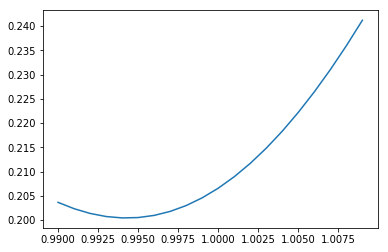

In [97]:
#计算总体权重
print("weight correction")
W=[(0.990+(i/1000)) for i in range(20)]
S =[]
for w in W:
    error = rmspe(np.expm1(y_valid), np.expm1(yhat*w))
    print('RMSPE for {:.3f}:{:.6f}'.format(w,error))
    S.append(error)
Score = pd.Series(S,index=W)
Score.plot()
BS = Score[Score.values == Score.values.min()]
print ('Best weight for Score:{}'.format(BS))

In [98]:
#mappings = {'0':0, 'a':1, 'b':2, 'c':3, 'd':4}
#test.StoreType.replace(mappings, inplace=True)
#test.Assortment.replace(mappings, inplace=True)
#test.StateHoliday.replace(mappings, inplace=True)

In [99]:
print("Make predictions on the test set")
#y_test=np.log(test.Sales)
dtest=xgb.DMatrix(x_test) 
test_probs = gbm.predict(dtest)
# Make Submission
#result = pd.DataFrame({"Id": test["Id"], 'Sales': np.expm1(test_probs)})
result = pd.DataFrame({"Id": test["Id"], 'Sales':np.exp(test_probs)})
result.to_csv("Rossmann_submission_xgboost_1.csv", index=False)
#np.savetxt('xgb_submission1.csv',np.c_[range(1,len(test)+1),test_probs],delimiter=',',header='Id,Sales',comments=' ',fmt='%d') 
# XGB feature importances



Make predictions on the test set


In [100]:
result = pd.DataFrame({"Id": test["Id"], 'Sales':np.exp(test_probs*0.995)})
result.to_csv("Rossmann_submission_xgboost_2.csv", index=False)

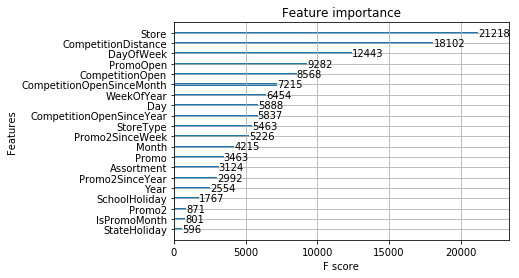

In [101]:
xgb.plot_importance(gbm)

In [ ]:
params={
'booster':'gbtree',
'objective': 'reg:linear', #线性回归问题
'gamma':0.1,  # 用于控制是否后剪枝的参数,越大越保守，一般0.1、0.2这样子。
'max_depth':12, # 构建树的深度，越大越容易过拟合
'lambda':2,  # 控制模型复杂度的权重值的L2正则化项参数，参数越大，模型越不容易过拟合。
'subsample':0.7, # 随机采样训练样本
'colsample_bytree':0.7, # 生成树时进行的列采样
'min_child_weight':3, 
# 这个参数默认是 1，是每个叶子里面 h 的和至少是多少，对正负样本不均衡时的 0-1 分类而言
#，假设 h 在 0.01 附近，min_child_weight 为 1 意味着叶子节点中最少需要包含 100 个样本。
#这个参数非常影响结果，控制叶子节点中二阶导的和的最小值，该参数值越小，越容易 overfitting。 
'silent':0 ,#设置成1则没有运行信息输出，最好是设置为0.
'eta': 0.3, # 如同学习率
'seed':1000,
'nthread':7,# cpu 线程数
#'eval_metric': 'auc'
}
plst = list(params.items())
num_rounds = 20 # 迭代次数




